# AdaBoost
**Here is How to create the basic AdaBoost Classifier**
[AdaBoost](https://medium.com/data-science/adaboost-classifier-explained-a-visual-guide-with-code-examples-fc0f25326d7b)
![The Data](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*O0_DqZWXc5OM--Zxp3_uuw.png)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Create and prepare dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                   72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                   88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Rearrange columns
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]

# Prepare features and target
X,y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

**The Main Mechanism**
- Initialize Weights: Assign equal weight to each training example.
- Iterative Learning: In each step, a simple decision tree is trained and its performance is checked. Misclassified examples get more weight, making them a priority for the next tree. Correctly classified examples stay the same, and all weights are adjusted to add up to 1.
- Build Weak Learners: Each new, simple tree targets the mistakes of the previous ones, creating a sequence of specialized weak learners.
- Final Prediction: Combine all trees through weighted voting, where each tree’s vote is based on its importance value, giving more influence to more accurate trees.

## The Train Step
**SAMME**
- Decide the weak learner to be used. A one-level decision tree (or “stump”) is the default choice.
- Decide how many weak learner (in this case the number of trees) you want to build (the default is 50 trees).
- Start by giving each training example equal weight:

**For the first tree**
- Build a decision stump while considering sample weights
    - Calculate initial weighted Gini impurity for the root node
    - For each feature: sort data by feature values (exactly like in Decision Tree classifier)
    - For each possible split point:
        - Split samples into left and right groups
        - Calculate weighted Gini impurity for both groups
        - Calculate weighted Gini impurity reduction for this split
    - Pick the split that gives the largest Gini impurity reduction
    - Create a simple one-split tree using this decision
- Evaluate how good this tree is
    - Use the tree to predict the label of the training set.
    - Add up the weights of all misclassified samples to get error rate
    - Calculate tree importance (α) using: 
        - $a = learning\_rate × \log((1-error)/error)$
    - Update sample weights
        - Keep the original weights for correctly classified samples
        - Multiply the weights of misclassified samples by e^(α).
        - Divide each weight by the sum of all weights. This normalization ensures all weights still sum to 1 while maintaining their relative proportions.

**For the second tree**
- Build a new stump, but now using the updated weights
    - Calculate new weighted Gini impurity for root node: Will be different because misclassified samples now have bigger weights
    -  For each feature: Same process as before, but the weights have changed
    - Create the second stump
- Evaluate this new tree
    - Update weights again — Same process: increase weights for mistakes then normalize.

**For the third tree onwards**
- Repeat Step 2.1–2.3 for all remaining trees.

**Final step**
- Keep all trees and their importance scores
![the final step](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*_0VFjJSLP1mP8gDmChpjag.png)


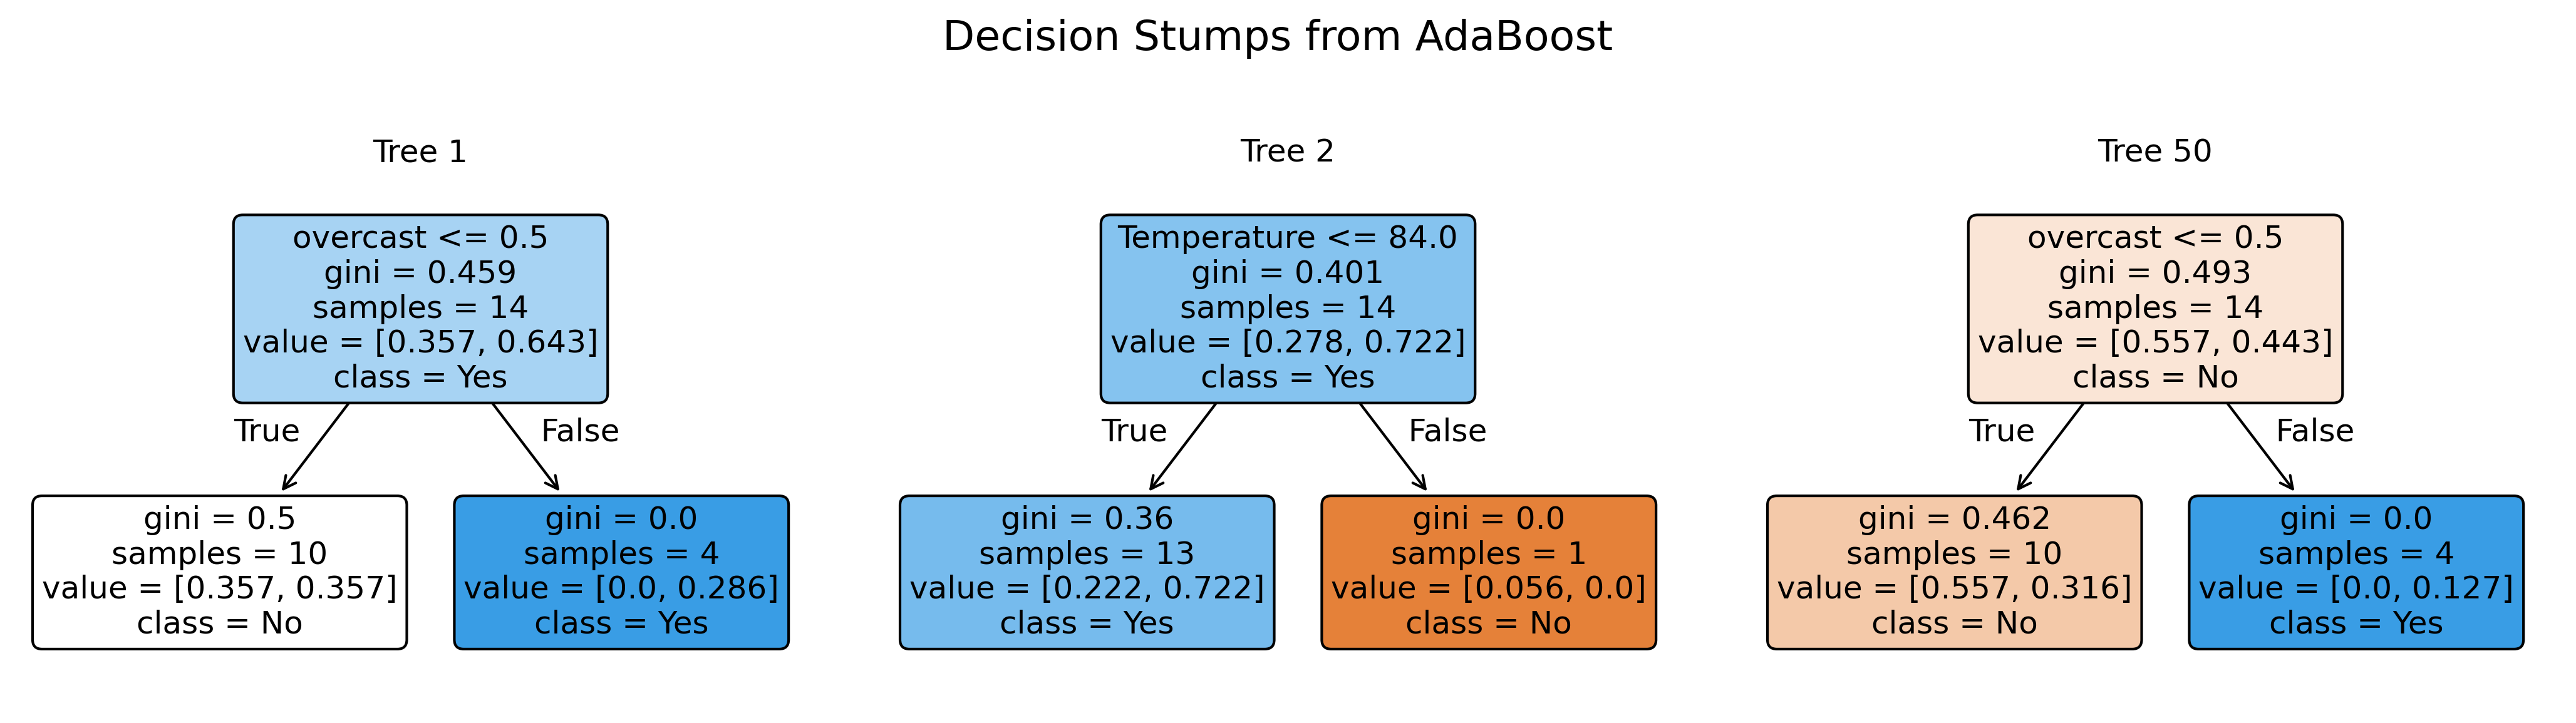

In [5]:
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train AdaBoost
np.random.seed(42)  # For reproducibility
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Create visualizations for trees 1, 2, and 50
trees_to_show = [0, 1, 49]
feature_names = X_train.columns.tolist()
class_names = ['No', 'Yes']

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(14,4), dpi=300)
fig.suptitle('Decision Stumps from AdaBoost', fontsize=16)

# Plot each tree
for idx, tree_idx in enumerate(trees_to_show):
    plot_tree(clf.estimators_[tree_idx],
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              ax=axes[idx],
              fontsize=12)  # Increased font size
    axes[idx].set_title(f'Tree {tree_idx + 1}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])